![alt text](heatmap_test.svg "Titulo")

### Librerías a utilizar

In [1]:
import os # Encontrar archivos de bandas en carpeta

import matplotlib.pyplot as plt # Grafico de valores de pixel
from matplotlib.ticker import MultipleLocator # Grilla para ubicar pixeles

import rasterio as rio # Carga de raster

# Mapa referencial a color
import earthpy.spatial as es # Agrupación de bandas en un objeto
import earthpy.plot as ep # Grafico de bandas para imagen RBG

### Cargar archivos desde el sistema

In [2]:
# Obtener nombre de cada banda
carpeta_archivos = 'data/'

archivos_bandas = os.listdir(carpeta_archivos)
archivos_bandas

['b1.tif', 'b2.tif', 'b3.tif', 'b4.tif', 'b5.tif', 'b6.tif', 'b7.tif']

In [3]:
# Obtener ruta completa uniendo la carpeta con los archivos
archivos_bandas = [os.path.join(carpeta_archivos, archivo) for archivo in archivos_bandas] 
archivos_bandas

['data/b1.tif',
 'data/b2.tif',
 'data/b3.tif',
 'data/b4.tif',
 'data/b5.tif',
 'data/b6.tif',
 'data/b7.tif']

### Cargar archivos y leer como matriz

In [4]:
# Abriendo solo primera banda
archivo_banda_1 = archivos_bandas[0]
archivo_banda_1

'data/b1.tif'

In [5]:
with rio.open(archivo_banda_1) as b1: # Abrir primera banda con rasterio (rio)
    banda_1 = b1.read(1) # Leer info banda, 1 señala la unica banda existente

banda_1

array([[8348, 8334, 8324, ..., 9143, 9197, 9165],
       [8328, 8340, 8325, ..., 9224, 9174, 9158],
       [8318, 8314, 8320, ..., 9229, 9191, 9192],
       ...,
       [8389, 8396, 8397, ..., 9180, 9125, 9027],
       [8398, 8386, 8389, ..., 8952, 9044, 8971],
       [8383, 8396, 8412, ..., 8941, 9041, 9058]], dtype=uint16)

#### Filas y columnas de la matriz

In [6]:
# Filas y columnas de la matriz (equivalentes a largo y ancho en pixeles del raster)

banda_1.shape

(994, 1623)

#### Acceder a un valor en particular de la matriz (pixel del raster)

In [7]:
# Esquina superior izquierda

print(banda_1[0, 0])

8348


In [8]:
# Esquina inferior derecha

print(banda_1[993, 1622]) # Se resta 1 porque los indices en python comienzan en 0

9058


#### Generalizar proceso para una lista de bandas

In [9]:
# Lista de matrices para cada banda

lista_matrices = []
for banda in archivos_bandas:
    with rio.open(banda) as b:
        banda = b.read(1)
        lista_matrices.append(banda)
        
lista_matrices[2]

array([[6362, 6375, 6370, ..., 8310, 8520, 8547],
       [6362, 6355, 6362, ..., 8652, 8603, 8620],
       [6346, 6348, 6359, ..., 8685, 8640, 8682],
       ...,
       [6443, 6446, 6462, ..., 8952, 8798, 8530],
       [6458, 6460, 6468, ..., 8507, 8692, 8531],
       [6477, 6494, 6477, ..., 8485, 8675, 8636]], dtype=uint16)

In [10]:
# Extraer valor del pixel x=100/y=100 de cada banda mediante matriz[fila, columna]

nd_por_banda = []
for matriz in lista_matrices:
    valor_pixel = matriz[100, 100] # Valores arbitrario de pixel
    nd_por_banda.append(valor_pixel) # Agregar valor a lista

print('Valores por banda del pixel elegido: \n')
print(nd_por_banda)

Valores por banda del pixel elegido: 

[8278, 7508, 6338, 5738, 5289, 5062, 5036]


### Graficar valores por banda

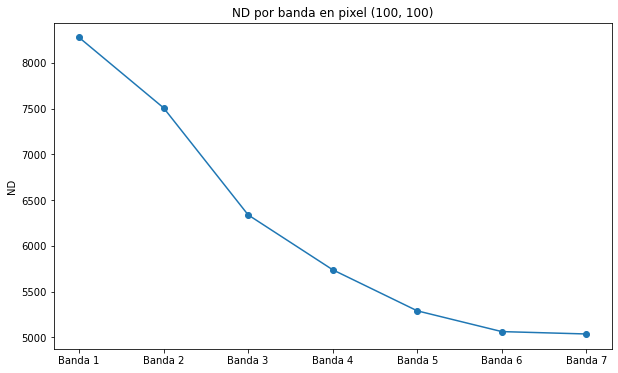

In [11]:
# Figura
fig, ax = plt.subplots(figsize=(10,6))

# Datos de "x" e "y"
labels = [f'Banda {x}' for x in range(1,8)] # Nombres de bandas
valores = nd_por_banda

ax.plot(labels, valores) # Linea
ax.scatter(labels, valores) # Puntos

ax.set_title('ND por banda en pixel (100, 100)')
ax.set_ylabel('ND')

plt.show()

### Función generalizada

In [16]:
def grafico_px_bandas(bandas, x, y):
    # Transformación a matriz de cada banda
    lista_matrices = []
    for banda in bandas:
        with rio.open(banda) as b:
            banda = b.read(1)
            lista_matrices.append(banda)
    
    # Extraer valor del pixel de cada banda mediante matriz[fila, columna]
    nd_por_banda = []
    for matriz in lista_matrices:
        valor_pixel = matriz[y, x]
        nd_por_banda.append(valor_pixel)
    
    # Figura
    fig, ax = plt.subplots(figsize=(10,7))

    labels = [f'Banda {x}' for x in range(1,8)] # Nombres de bandas

    ax.plot(labels, nd_por_banda)
    ax.scatter(labels, nd_por_banda)

    ax.set_ylabel('ND')
    
    plt.show() # Mostrar figura

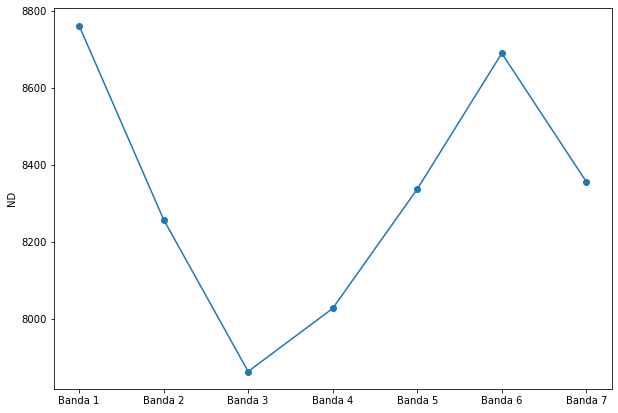

In [18]:
grafico_px_bandas(archivos_bandas, 800, 400)

### (Adicional) Ploteo de pixel e imagen en color real

In [19]:
def ploteo_mapa_cnatural(bandas, x=0, y=0):
    # Figura
    fig, ax = plt.subplots(figsize=(22, 10))
   
    # Agrupar bandas en 1 objeto
    arr_st, meta = es.stack(bandas)
    
    # Bandas 4-3-2 para color natural
    ep.plot_rgb(arr_st, rgb=(3, 2, 1), ax=ax, title=f"Landsat 8 Bandas 4 - 3 - 2 (color natural)", stretch=True)
    
    # Grilla ejes x e y para localizar mejor los pixeles
    ax.grid(True, alpha=0.5)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Punto para indicar el pixel
    ax.scatter(x, y, s=100, color='red', edgecolor='grey', linewidth=1.2, zorder=5)
    
    plt.plot()

In [20]:
%matplotlib
ploteo_mapa_cnatural(archivos_bandas, 100, 100)

Using matplotlib backend: Qt5Agg


### Funcion general

In [21]:
def ploteo_mapa_pixel(bandas, x=0, y=0):
    # Figura
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios':[2, 1]})
    
    # Mapa
    
    # Agrupar bandas en 1 objeto
    arr_st, meta = es.stack(bandas)
    
    # Bandas 4 - 3 - 2 para color natural
    ep.plot_rgb(arr_st, rgb=(3, 2, 1), ax=ax1, title=f"Landsat 8 Bandas 4 - 3 - 2 (color natural)", stretch=True)
    
    # Grilla ejes x e y cada 100 px
    ax1.grid(True, alpha=0.5)
    ax1.xaxis.set_major_locator(MultipleLocator(100))
    ax1.yaxis.set_major_locator(MultipleLocator(100))
    
    ax1.scatter(x, y, s=80, color='red', edgecolor='grey', linewidth=1, zorder=4)

    # Valor de pixel por banda
    
    # Transformación a matriz de cada banda
    lista_matrices = []
    for banda in archivos_bandas:
        with rio.open(banda) as b:
            banda = b.read(1)
            lista_matrices.append(banda)
    
    # Extraer valor del pixel de cada banda mediante matriz[fila, columna]
    nd_por_banda = []
    for matriz in lista_matrices:
        valor_pixel = matriz[y, x]
        nd_por_banda.append(valor_pixel)

    labels = [f'Banda {x}' for x in range(1,8)] # Nombres de bandas
    
    ax2.set_ylabel('ND')
    ax2.plot(labels, nd_por_banda)
    ax2.scatter(labels, nd_por_banda)
    
    plt.tight_layout()
    plt.show()

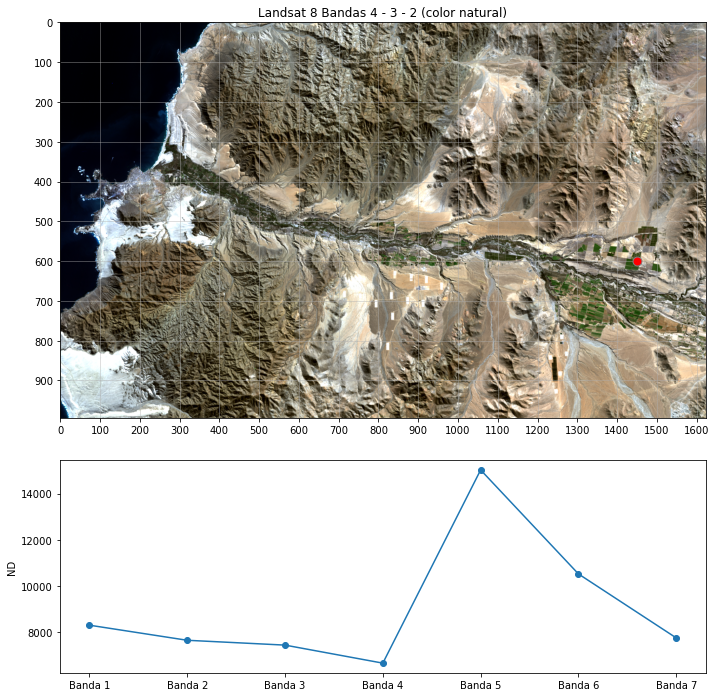

In [23]:
%matplotlib inline
ploteo_mapa_pixel(archivos_bandas, 1450, 600)